In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pickle
import gc
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate, concatenate
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D
from keras import optimizers
from keras.optimizers import Adam
import keras
from keras.models import Sequential
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve
from matplotlib import pyplot

#from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D

In [ ]:
DataPath = '/content/drive/My Drive/apps/stress detection/data/chest'

In [ ]:
!ls '/content/drive/My Drive/apps/stress detection/data/chest'

In [ ]:
# specify file names
fileName_target = DataPath + '/' + 'data_chest_groundTruth_2classes_stress_5secWindow.pkl'
fileName_xACC = DataPath + '/' + 'data_chest_xACC_5secWindow,pkl'
fileName_yACC = DataPath + '/' + 'data_chest_yACC_5secWindow,pkl'
fileName_zACC = DataPath + '/' + 'data_chest_zACC_5secWindow,pkl'
fileName_ECG  = DataPath + '/' + 'data_chest_ECG_5secWindow,pkl'
fileName_EDA  = DataPath + '/' + 'data_chest_EDA_5secWindow,pkl'
fileName_EMG  = DataPath + '/' + 'data_chest_EMG_5secWindow,pkl'
fileName_Temp = DataPath + '/' + 'data_chest_Temp_5secWindow,pkl'
fileName_Resp = DataPath + '/' + 'data_chest_Resp_5secWindow,pkl'

In [ ]:
# read data files
with open(fileName_target, 'rb') as f:
   data_targets = pickle.load(f)
with open(fileName_EDA,'rb') as f:
   data_EDA = pickle.load(f)
with open(fileName_ECG,'rb') as f:
   data_ECG = pickle.load(f)
with open(fileName_EMG,'rb') as f:
   data_EMG = pickle.load(f)
with open(fileName_Resp,'rb') as f:
   data_Resp = pickle.load(f)
with open(fileName_Temp,'rb') as f:
   data_Temp = pickle.load(f)
with open(fileName_xACC,'rb') as f:
   data_xACC = pickle.load(f)
with open(fileName_yACC,'rb') as f:
   data_yACC = pickle.load(f)
with open(fileName_zACC,'rb') as f:
   data_zACC = pickle.load(f)


In [ ]:
print ('data_targets shape:', data_targets.shape)
print ('data_EDA shape:', data_EDA.shape)
print ('data_ECG shape:', data_ECG.shape)
print ('data_EMG shape:', data_EMG.shape)
print ('data_Resp shape:', data_Resp.shape)
print ('data_Temp shape:', data_Temp.shape)
print ('data_ACC_x shape:', data_xACC.shape)
print ('data_ACC_y shape:', data_yACC.shape)
print ('data_ACC_z shape:', data_zACC.shape)

In [ ]:
data = np.concatenate([data_ECG, data_EDA, data_EMG, data_Resp, data_Temp, data_xACC, data_yACC, data_zACC], axis=1)
print ('data shape:', data.shape)
del data_EDA, data_ECG, data_EMG, data_Resp, data_Temp
del data_xACC, data_yACC, data_zACC
gc.collect()

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print ('data_scaled shape:', data_scaled.shape)
del data
gc.collect()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data_targets, test_size=0.30, random_state=42)
print ("X_train size:", X_train.shape, "Y_train size", len(y_train))
print ("X_test size:", X_test.shape, "Y_test size", len(y_test))

In [ ]:
wsize = 3500
x_tr_1 = np.expand_dims(X_train[:,0*wsize:1*wsize], axis=2)
x_tr_2 = np.expand_dims(X_train[:,1*wsize:2*wsize], axis=2)
x_tr_3 = np.expand_dims(X_train[:,2*wsize:3*wsize], axis=2)
x_tr_4 = np.expand_dims(X_train[:,3*wsize:4*wsize], axis=2)
x_tr_5 = np.expand_dims(X_train[:,4*wsize:5*wsize], axis=2)
x_tr_6 = np.expand_dims(X_train[:,5*wsize:6*wsize], axis=2)
x_tr_7 = np.expand_dims(X_train[:,6*wsize:7*wsize], axis=2)
x_tr_8 = np.expand_dims(X_train[:,7*wsize:8*wsize], axis=2)

x_tst_1 = np.expand_dims(X_test[:,0*wsize:1*wsize], axis=2)
x_tst_2 = np.expand_dims(X_test[:,1*wsize:2*wsize], axis=2)
x_tst_3 = np.expand_dims(X_test[:,2*wsize:3*wsize], axis=2)
x_tst_4 = np.expand_dims(X_test[:,3*wsize:4*wsize], axis=2)
x_tst_5 = np.expand_dims(X_test[:,4*wsize:5*wsize], axis=2)
x_tst_6 = np.expand_dims(X_test[:,5*wsize:6*wsize], axis=2)
x_tst_7 = np.expand_dims(X_test[:,6*wsize:7*wsize], axis=2)
x_tst_8 = np.expand_dims(X_test[:,7*wsize:8*wsize], axis=2)

In [ ]:
def binary_decision(prob):
  dec=[]
  for k in range(len(prob)):
    if prob[k]>=.5:
      d = 1
    else:
      d = 0
    dec.append(d)
  return dec

def accuracy(y_d, y_e):
  numErr=0
  for k in range(len(y_d)):
    if y_d[k]!=y_e[k]:
      numErr+=1
  return 1.0 - numErr/len(y_d)

In [ ]:
def model_2classes_5sensors_and_xyzAcc_5secWindow_Conv1D8x15Strd2MP4x4_Conv1D16x7Strd2MP4x4_Conv1D32x3Strd1MP2x2_Dense32_Dense16_Dense1():

   inputs_1 = Input(shape=(3500,1))
   inputs_2 = Input(shape=(3500,1))
   inputs_3 = Input(shape=(3500,1))
   inputs_4 = Input(shape=(3500,1))
   inputs_5 = Input(shape=(3500,1))
   inputs_6 = Input(shape=(3500,1))
   inputs_7 = Input(shape=(3500,1))
   inputs_8 = Input(shape=(3500,1))

   x1 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_1)
   x2 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_2)
   x3 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_3)
   x4 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_4)
   x5 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_5)
   x6 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_6)
   x7 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_7)
   x8 = Conv1D(8, 15, strides=2, padding='same',activation='relu')(inputs_8)

   x1 = MaxPooling1D(4 ,4)(x1)
   x2 = MaxPooling1D(4 ,4)(x2)
   x3 = MaxPooling1D(4 ,4)(x3)
   x4 = MaxPooling1D(4 ,4)(x4)
   x5 = MaxPooling1D(4 ,4)(x5)
   x6 = MaxPooling1D(4 ,4)(x6)
   x7 = MaxPooling1D(4 ,4)(x7)
   x8 = MaxPooling1D(4 ,4)(x8)

   x1 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x1)
   x2 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x2)
   x3 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x3)
   x4 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x4)
   x5 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x5)
   x6 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x6)
   x7 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x7)
   x8 = Conv1D(16, 7, strides=2, padding='same',activation='relu')(x8)

   x1 = MaxPooling1D(4 ,4)(x1)
   x2 = MaxPooling1D(4 ,4)(x2)
   x3 = MaxPooling1D(4 ,4)(x3)
   x4 = MaxPooling1D(4 ,4)(x4)
   x5 = MaxPooling1D(4 ,4)(x5)
   x6 = MaxPooling1D(4 ,4)(x6)
   x7 = MaxPooling1D(4 ,4)(x7)
   x8 = MaxPooling1D(4 ,4)(x8)

   x1 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x1)
   x2 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x2)
   x3 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x3)
   x4 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x4)
   x5 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x5)
   x6 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x6)
   x7 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x7)
   x8 = Conv1D(32, 3, strides=1, padding='same',activation='relu')(x8)

   x1 = MaxPooling1D(2 ,2)(x1)
   x2 = MaxPooling1D(2 ,2)(x2)
   x3 = MaxPooling1D(2 ,2)(x3)
   x4 = MaxPooling1D(2 ,2)(x4)
   x5 = MaxPooling1D(2 ,2)(x5)
   x6 = MaxPooling1D(2 ,2)(x6)
   x7 = MaxPooling1D(2 ,2)(x7)
   x8 = MaxPooling1D(2 ,2)(x8)

   y = concatenate([x1,x2,x3,x4,x5,x6,x7,x8])
   y = Flatten()(y)
   y = Dense(32, activation='relu')(y)
   y = Dense(16, activation='relu')(y)

   out = Dense(1, activation = 'sigmoid')(y)

   model = Model([inputs_1, inputs_2, inputs_3, inputs_4, inputs_5, inputs_6, inputs_7, inputs_8], out)
   return model

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

n_folds = 10
kfold = KFold(n_folds, True, 1)
k = 0
y_valid_pred=np.zeros(y_train.shape)
y_test_pred=np.zeros(y_test.shape)
fold = 0
models = []
models_acc = []

for train_ix, test_ix in kfold.split(x_tr_1):
   model_name = 'model'+str(k)
   model_name = model_2classes_5sensors_and_xyzAcc_5secWindow_Conv1D8x15Strd2MP4x4_Conv1D16x7Strd2MP4x4_Conv1D32x3Strd1MP2x2_Dense32_Dense16_Dense1()
   model_name.compile(optimizer = Adam(lr=0.001, clipnorm=1.), loss="binary_crossentropy", metrics=['accuracy'])
   models.append( model_name )

   print ("train model", k)
   k = k+1
   Xfold_train = [x_tr_1[train_ix,:], x_tr_2[train_ix,:], x_tr_3[train_ix,:], x_tr_4[train_ix,:], x_tr_5[train_ix,:], x_tr_6[train_ix,:], x_tr_7[train_ix,:], x_tr_8[train_ix,:]]
   Yfold_train = y_train[train_ix]
   Xfold_valid = [x_tr_1[test_ix,:],  x_tr_2[test_ix,:],  x_tr_3[test_ix,:],  x_tr_4[test_ix,:], x_tr_5[test_ix,:], x_tr_6[test_ix,:], x_tr_7[test_ix,:], x_tr_8[test_ix,:] ]
   Yfold_valid = y_train[test_ix]
   history = model_name.fit(Xfold_train, Yfold_train, epochs=50, batch_size=40, validation_data=(Xfold_valid, Yfold_valid))

   # accumulate predictions for validation and test
   y_valid_pred[test_ix] = model_name.predict(Xfold_valid)
   y_test_pred += model_name.predict([x_tst_1, x_tst_2, x_tst_3, x_tst_4, x_tst_5, x_tst_6, x_tst_7, x_tst_8])

y_test_pred /= n_folds

In [ ]:
# calculate accuracy
y_pred_dec = binary_decision(y_test_pred)
y_test_accuracy = accuracy(y_test, y_pred_dec)
print ("accuracy_test:", y_test_accuracy)

In [ ]:
# calculate F1 score
y_test_dec = y_test
print('f1 score:', f1_score(y_test_dec, y_pred_dec) )

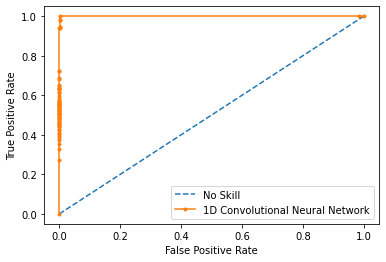

In [ ]:
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='1D Convolutional Neural Network')
# axis labelsona
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#results = [y_preds_valid, y_trues_valid]

In [ ]:
#with open('/content/drive/My Drive/apps/stress detection/Results/results_chest_stress_5sensors_and_3axisACC.pkl','wb') as f:
#      pickle.dump(results, f )